# Order Delivery Time Prediction

Name : Madhurashree M
Batch: C75

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [11]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
import sklearn
import warnings
warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [13]:
# Importing the file porter_data_1.csv
advertising = pd.read_csv("porter_data_1.csv")
advertising.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [20]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [22]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
advertising['created_at'] = pd.to_datetime(advertising['created_at'])
advertising['actual_delivery_time'] = pd.to_datetime(advertising['actual_delivery_time'])

advertising.dtypes[['created_at', 'actual_delivery_time']]

created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [25]:
# Convert categorical features to category type
# Convert selected categorical features to 'category' dtype
categorical_columns = ['market_id', 'store_primary_category', 'order_protocol']
advertising[categorical_columns] = advertising[categorical_columns].astype('category')

advertising.dtypes[categorical_columns]

market_id                 category
store_primary_category    category
order_protocol            category
dtype: object

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [27]:
# Calculate time taken in minutes
# Calculate time taken in minutes
advertising['delivery_time_minutes'] = (advertising['actual_delivery_time'] - advertising['created_at']).dt.total_seconds() / 60
advertising.head()


market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_minutes  
0                      21.0     34.44                   47.0  
1                       2.0     27.60                   44.0  
2                      18.0     11.56                   55.0  
3                       8.0     31.80                   59.0  
4                       7.0      8.20                   46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [33]:
# Extract the hour and day of week from the 'created_at' timestamp
advertising['order_hour'] = advertising['created_at'].dt.hour
advertising['order_dayofweek'] = advertising['created_at'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Create a categorical feature 'isWeekend'
advertising['isWeekend'] = advertising['order_dayofweek'].apply(lambda x: 1 if x >= 5 else 0).astype('category')

advertising.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_minutes  order_hour  \
0                      21.0     34.44                   47.0          22   
1                       2.0     27.60                   44.0          21   
2                      18.0     11.56                   55.0           0   
3                       8.0     31.80                   59.0           3   
4                       7.0      8.20                   46.0           2   

   order_dayofweek isWeekend  
0                4         0  
1                1         0  
2                0         0  
3                3         0  
4                1         0

In [35]:
# Drop unnecessary columns
advertising.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)


In [37]:
advertising[['order_hour', 'order_dayofweek', 'isWeekend']].head()

order_hour  order_dayofweek isWeekend
0          22                4         0
1          21                1         0
2           0                0         0
3           3                3         0
4           2                1         0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [40]:
# Define target variable (y) and features (X)
y = advertising['delivery_time_minutes']

X = advertising.drop(columns=['delivery_time_minutes'])

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [42]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [44]:
# Define numerical and categorical columns for easy EDA and data manipulation
categorical_cols = X_train.select_dtypes(include='category').columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']
Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

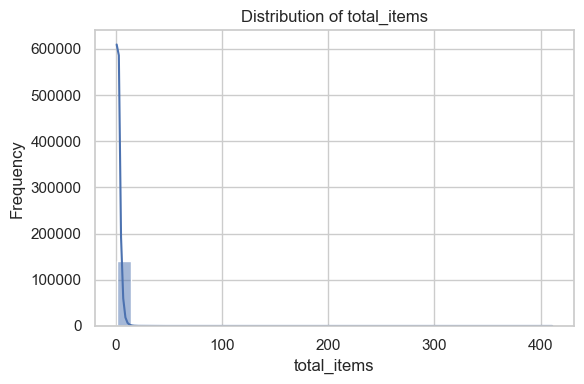

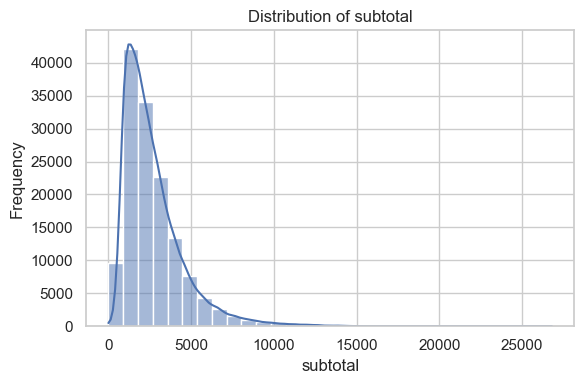

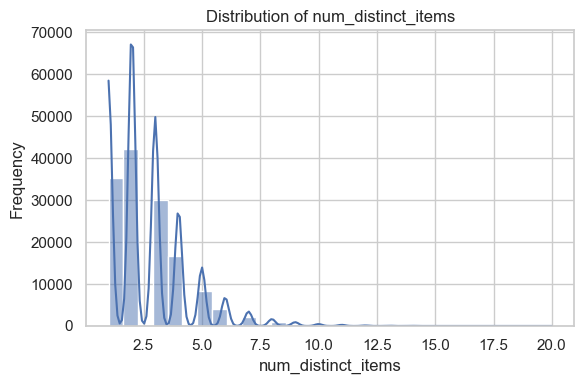

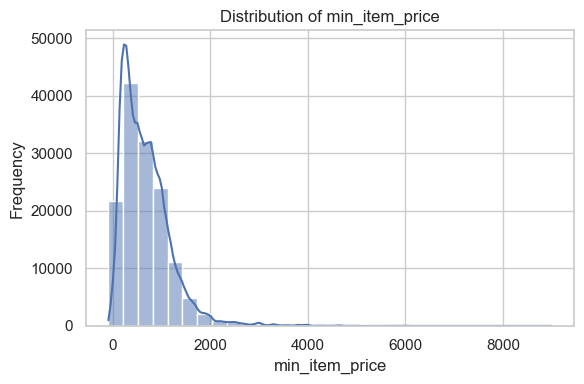

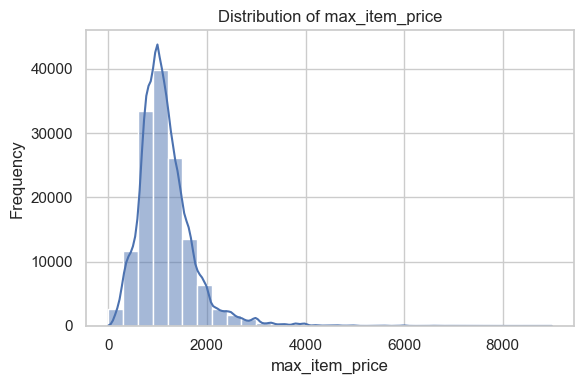

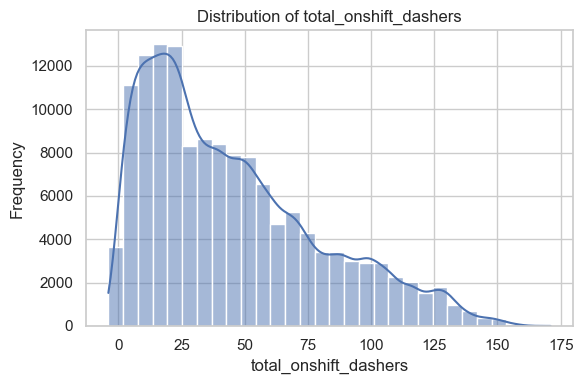

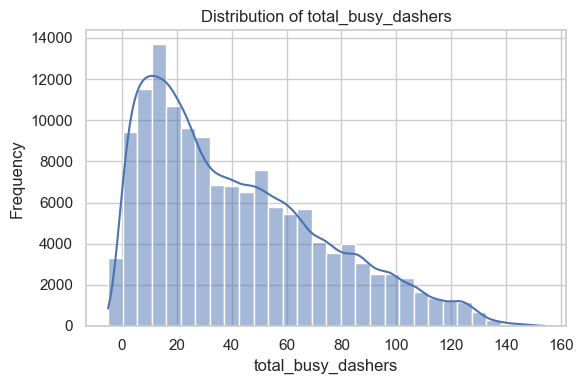

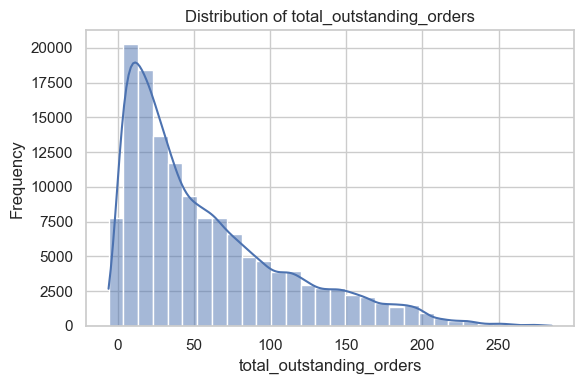

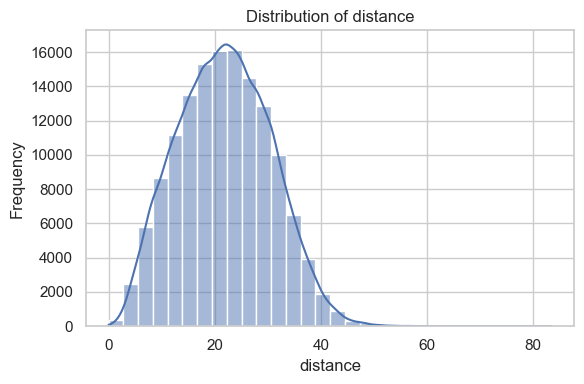

In [47]:
# Plot distributions for all numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

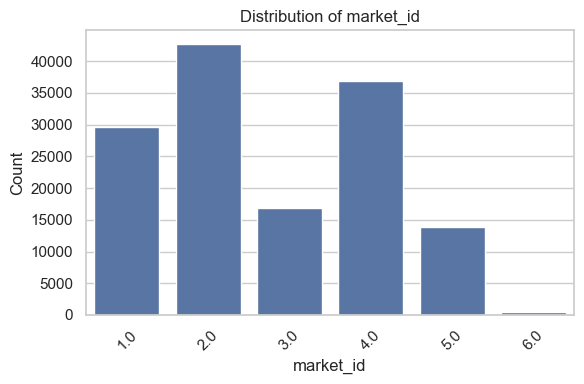

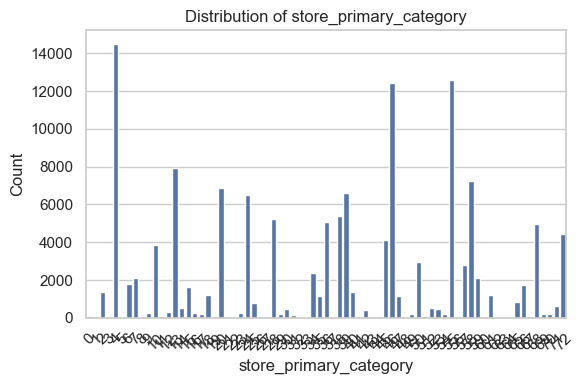

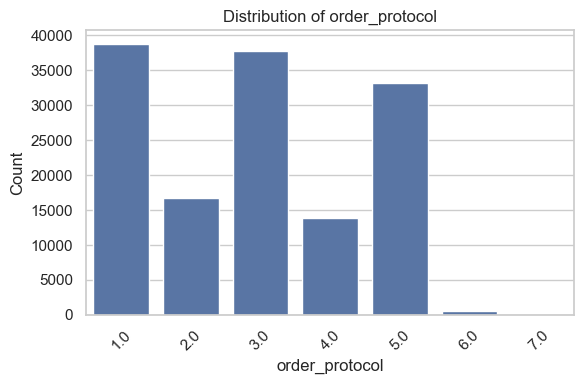

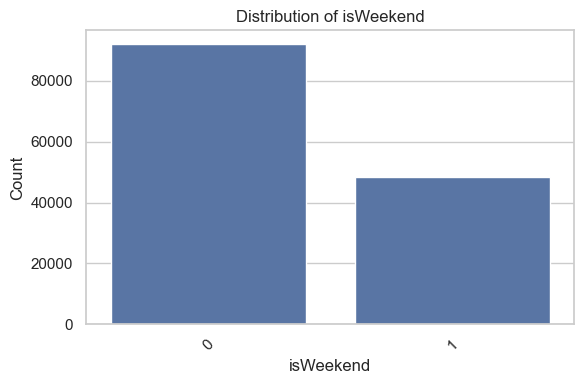

In [49]:
# Distribution of categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=X_train[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

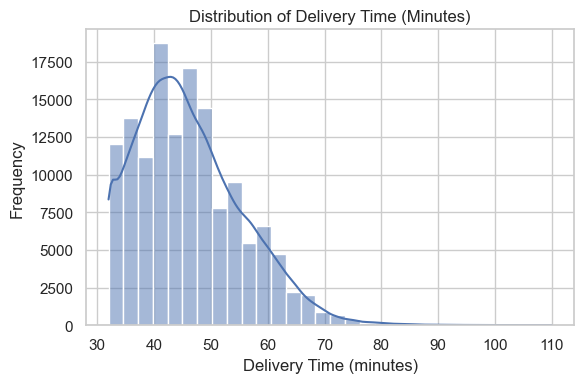

In [51]:
# Distribution of time_taken
plt.figure(figsize=(6, 4))
sns.histplot(y_train, kde=True, bins=30)
plt.title('Distribution of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

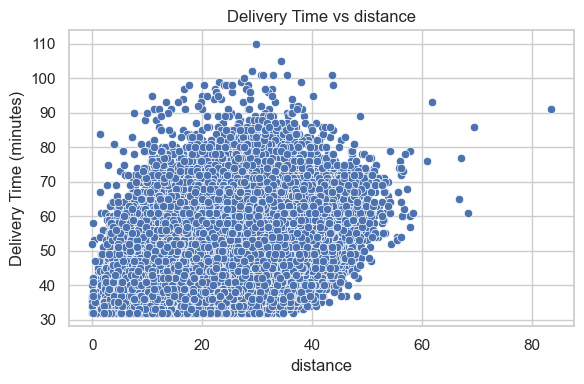

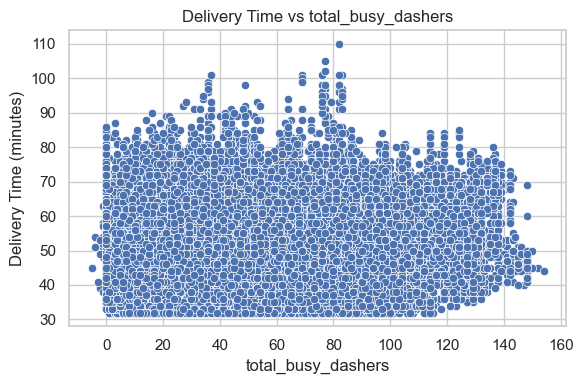

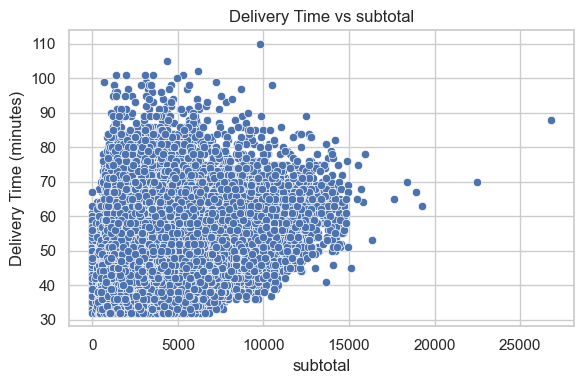

In [54]:
# Scatter plot to visualise the relationship between time_taken and other features

important_numerical = ['distance', 'total_busy_dashers', 'subtotal']

for col in important_numerical:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train[col], y=y_train)
    plt.title(f'Delivery Time vs {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Time (minutes)')
    plt.tight_layout()
    plt.show()

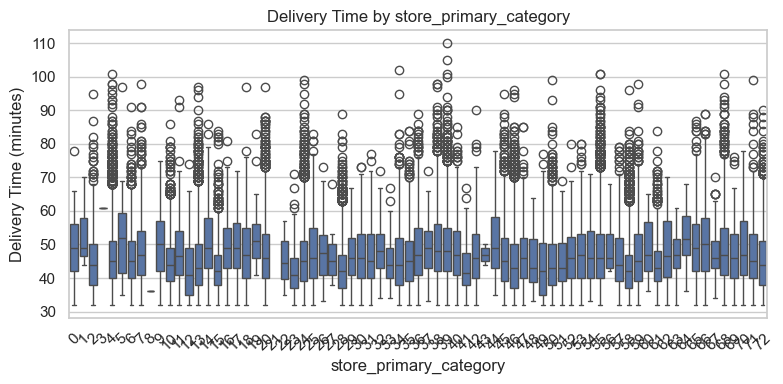

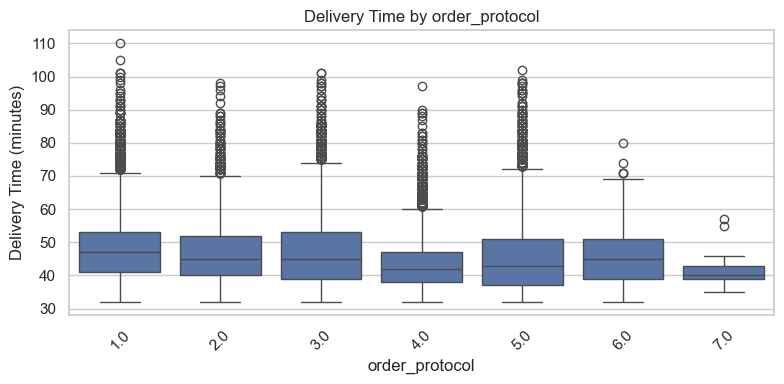

In [56]:
important_categorical = ['store_primary_category', 'order_protocol']

for col in important_categorical:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=X_train[col], y=y_train)
    plt.title(f'Delivery Time by {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Time (minutes)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

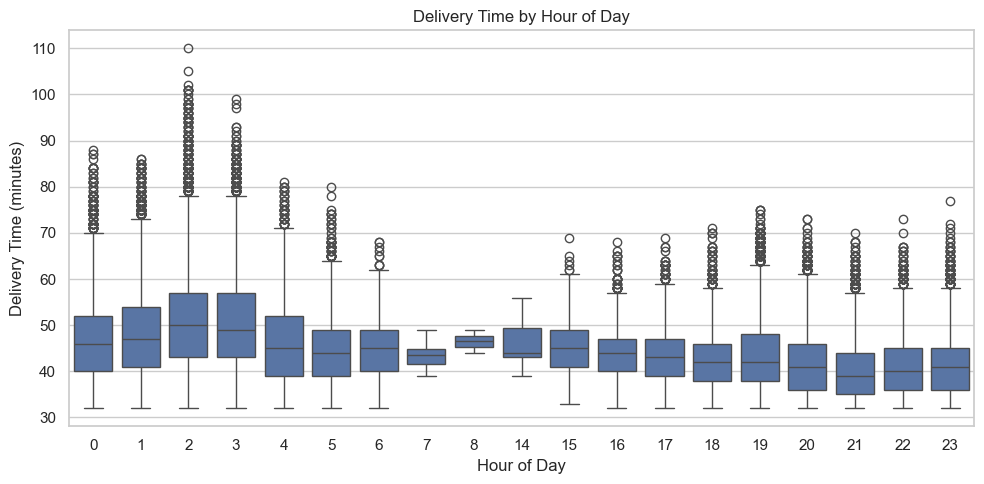

In [62]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(10, 5))
sns.boxplot(x=X_train['order_hour'], y=y_train)
plt.title('Delivery Time by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Delivery Time (minutes)')
plt.tight_layout()
plt.show()
# X_train.head()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

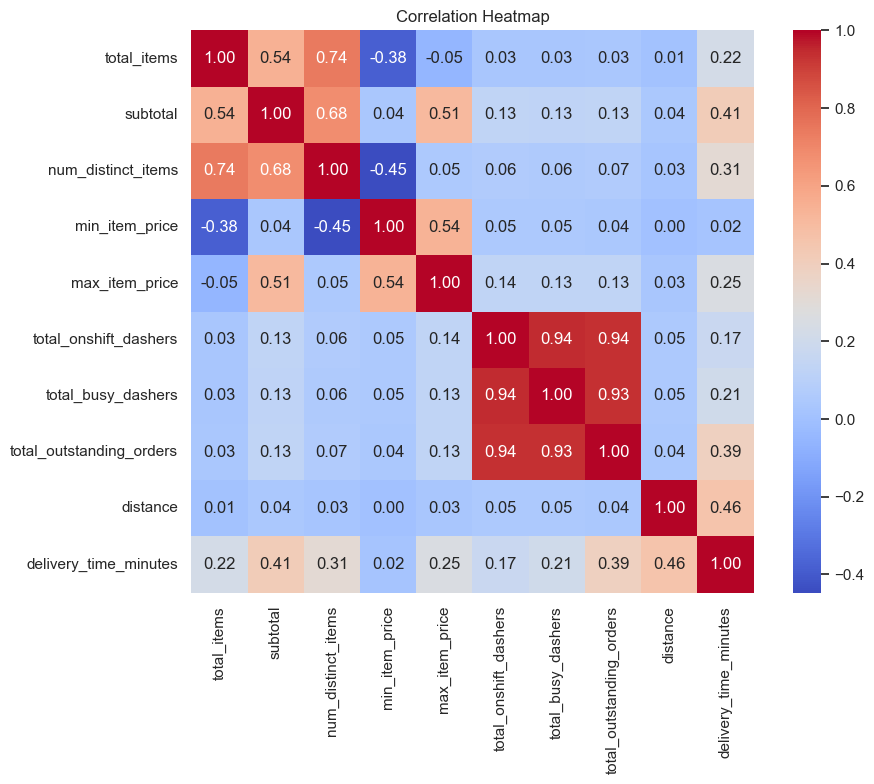

In [64]:
# Plot the heatmap of the correlation matrix
train_data = X_train.copy()
train_data['delivery_time_minutes'] = y_train

# Compute correlation matrix
corr_matrix = train_data[numerical_cols + ['delivery_time_minutes']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [66]:
# Drop 3-5 weakly correlated columns from training dataset
weak_corr_cols = ['min_item_price', 'total_items', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers']

X_train = X_train.drop(columns=weak_corr_cols)
X_test = X_test.drop(columns=weak_corr_cols)


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

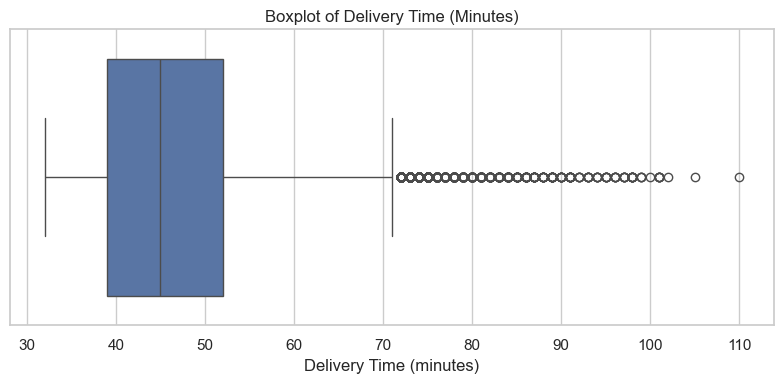

In [68]:
# Boxplot for time_taken
plt.figure(figsize=(8, 4))
sns.boxplot(x=y_train)
plt.title('Boxplot of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (minutes)')
plt.tight_layout()
plt.show()

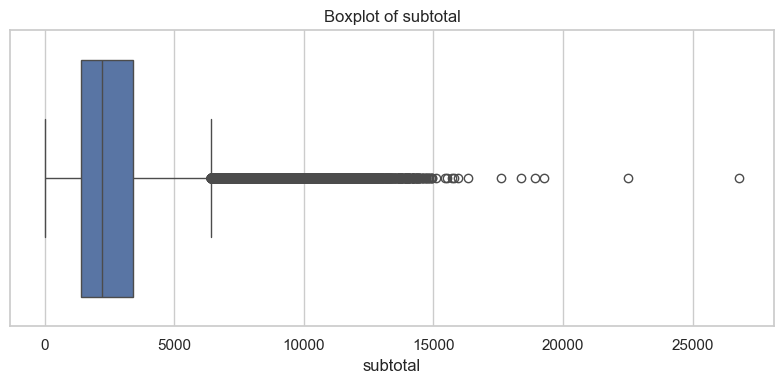

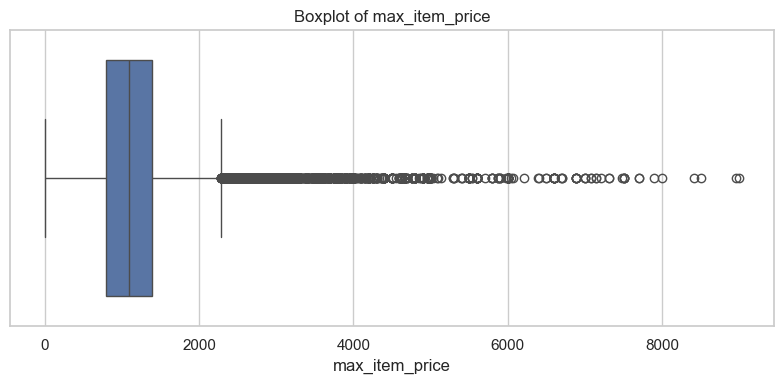

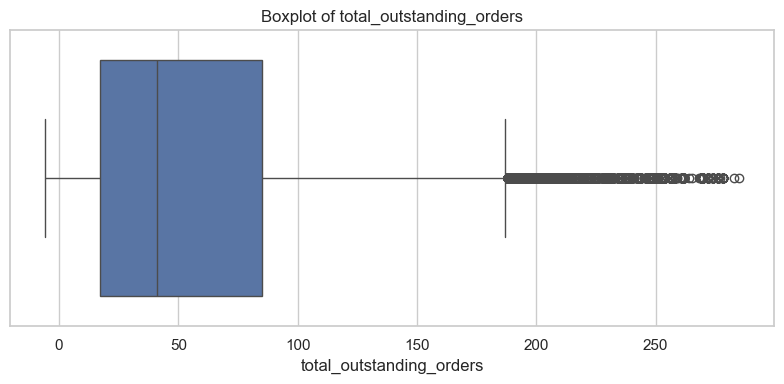

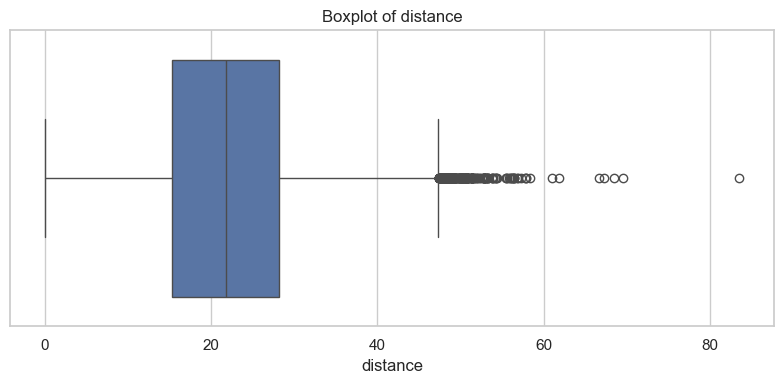

In [70]:
for col in numerical_cols:
    if col in X_train.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=X_train[col])
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()

In [72]:
# Combine features and target
train_data = X_train.copy()
train_data['delivery_time_minutes'] = y_train

# Describe numerical columns including target
desc_stats = train_data.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T

# Add IQR and potential outlier thresholds
desc_stats['IQR'] = desc_stats['75%'] - desc_stats['25%']
desc_stats['Lower_Bound'] = desc_stats['25%'] - 1.5 * desc_stats['IQR']
desc_stats['Upper_Bound'] = desc_stats['75%'] + 1.5 * desc_stats['IQR']

# Display results
pd.set_option('display.float_format', lambda x: '%.2f' % x)
desc_stats[['min', '1%', '5%', '25%', '50%', '75%', '95%', '99%', 'max', 'IQR', 'Lower_Bound', 'Upper_Bound']]


min     1%     5%     25%     50%     75%     95%  \
subtotal                  0.00 529.00 800.00 1418.00 2225.00 3415.00 6270.00   
max_item_price            0.00 255.00 437.00  799.00 1095.00 1395.00 2099.00   
total_outstanding_orders -6.00   0.00   3.00   17.00   41.00   85.00  169.00   
distance                  0.00   4.44   7.72   15.32   21.76   28.12   36.32   
order_hour                0.00   0.00   0.00    2.00    3.00   19.00   22.00   
order_dayofweek           0.00   0.00   0.00    1.00    3.00    5.00    6.00   
delivery_time_minutes    32.00  32.00  33.00   39.00   45.00   52.00   63.00   

                             99%      max     IQR  Lower_Bound  Upper_Bound  
subtotal                 9500.00 26800.00 1997.00     -1577.50      6410.50  
max_item_price           3099.00  8999.00  596.00       -95.00      2289.00  
total_outstanding_orders  213.00   285.00   68.00       -85.00       187.00  
distance                   41.84    83.52   12.80        -3.88        47.32  
order_hour                 23.00    23.00   17.00       -23.50        44.50  
order_dayofweek             6.00     6.00    4.00        -5.00        11.00  
delivery_time_minutes      71.00   110.00   13.00        19.50        71.50

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [74]:
# Handle outliers

def drop_outliers(df, col, lower, upper):
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Merge X_train and y_train for filtering
train_df = X_train.copy()
train_df['delivery_time_minutes'] = y_train

# Drop rows based on delivery_time_minutes bounds (example)
train_df = train_df[(train_df['delivery_time_minutes'] >= 19.5) & (train_df['delivery_time_minutes'] <= 71.5)]

X_train = train_df.drop('delivery_time_minutes', axis=1)
y_train = train_df['delivery_time_minutes']

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

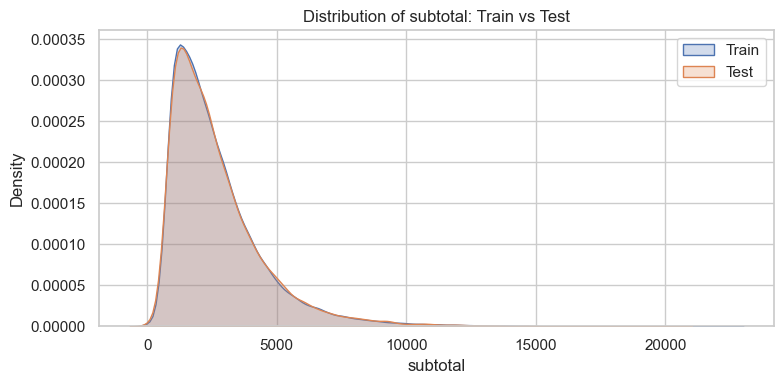

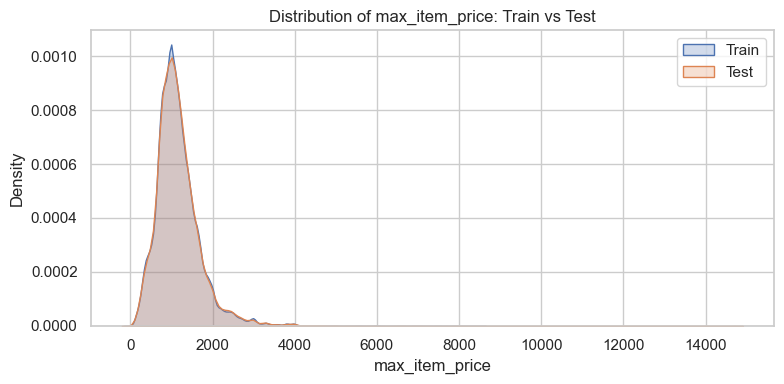

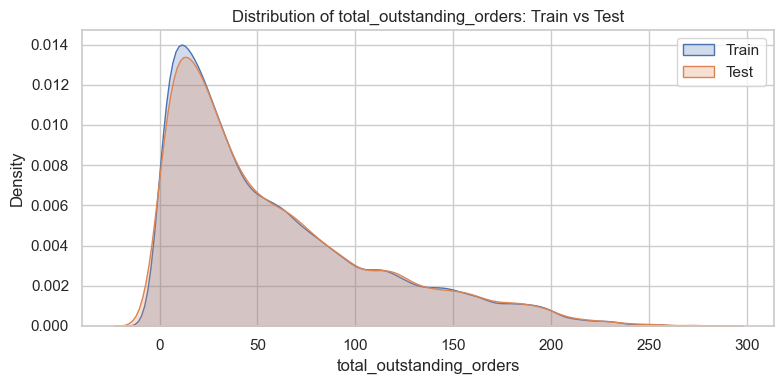

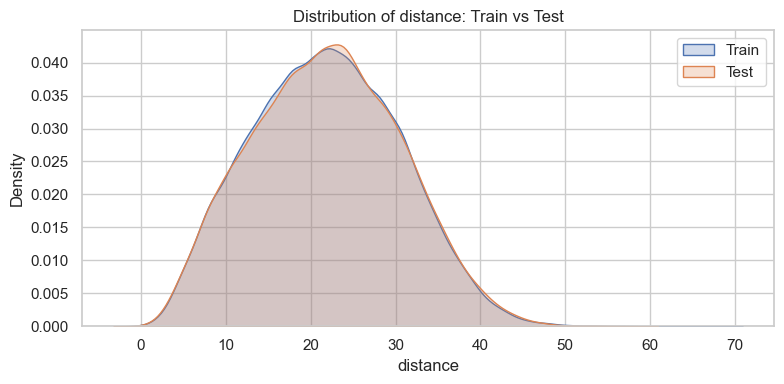

In [76]:
# Define numerical and categorical columns for easy EDA and data manipulation
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']
numerical_cols = ['subtotal', 'max_item_price', 'total_outstanding_orders', 'distance']  # Adjust if you've dropped more

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(X_train[col], label='Train', fill=True)
    sns.kdeplot(X_test[col], label='Test', fill=True)
    plt.title(f'Distribution of {col}: Train vs Test')
    plt.legend()
    plt.tight_layout()
    plt.show()

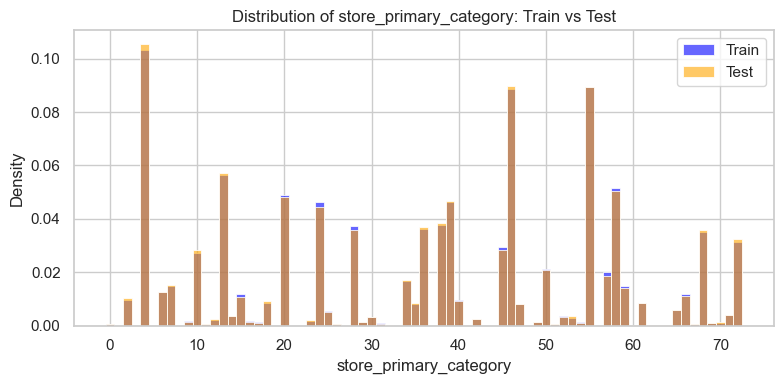

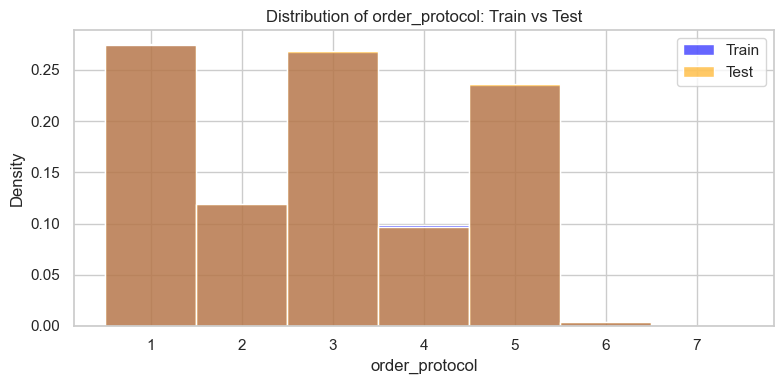

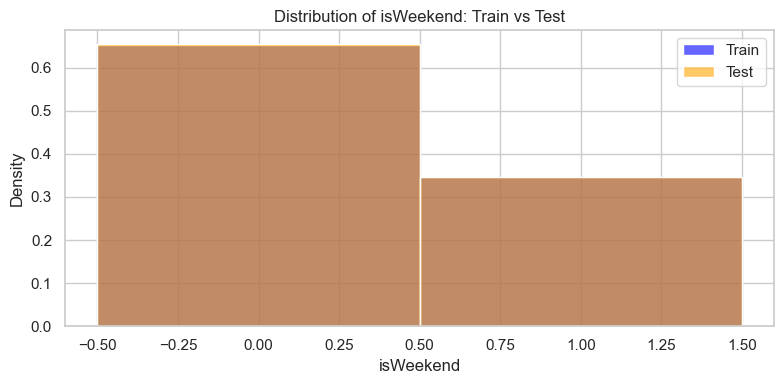

In [78]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_train[col], label='Train', stat='density', discrete=True, color='blue', alpha=0.6)
    sns.histplot(X_test[col], label='Test', stat='density', discrete=True, color='orange', alpha=0.6)
    plt.title(f'Distribution of {col}: Train vs Test')
    plt.legend()
    plt.tight_layout()
    plt.show()


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

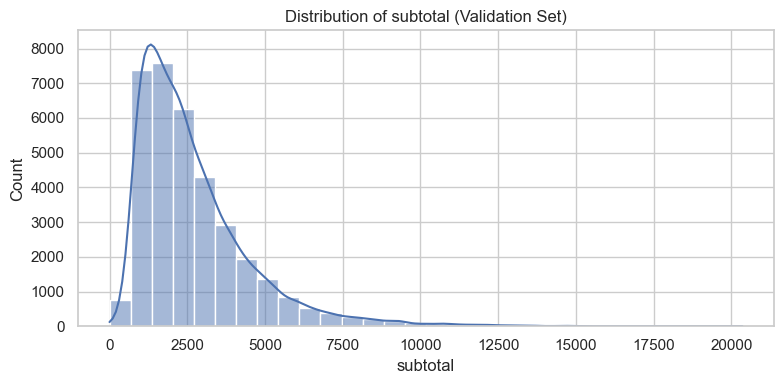

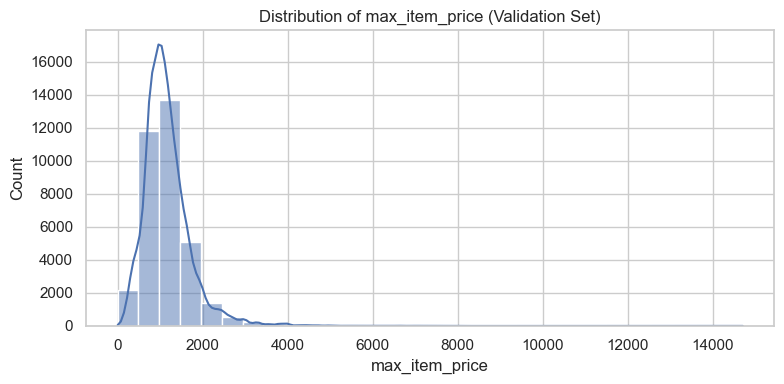

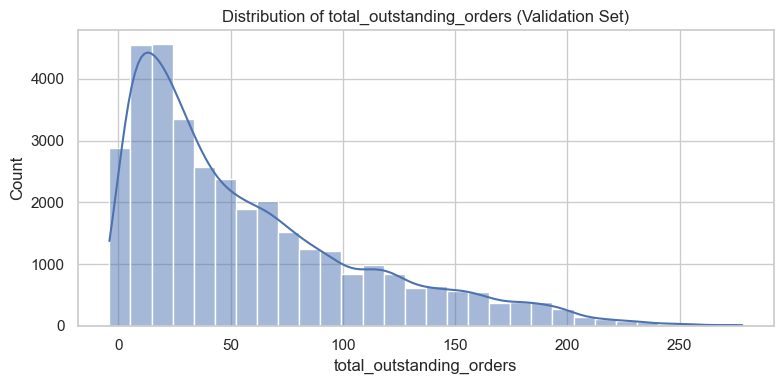

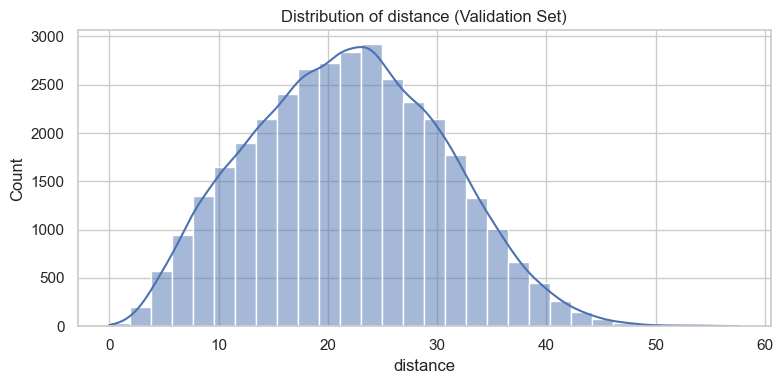

In [80]:
# Plot distributions for all numerical columns
for col in numerical_cols:
    if col in X_test.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(X_test[col], kde=True, bins=30)
        plt.title(f'Distribution of {col} (Validation Set)')
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()



##### **4.1.2**
Check the distribution of categorical features

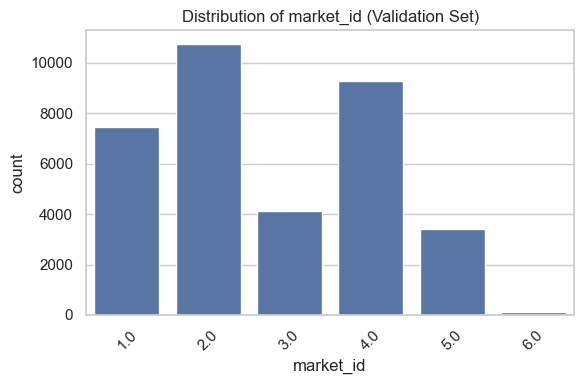

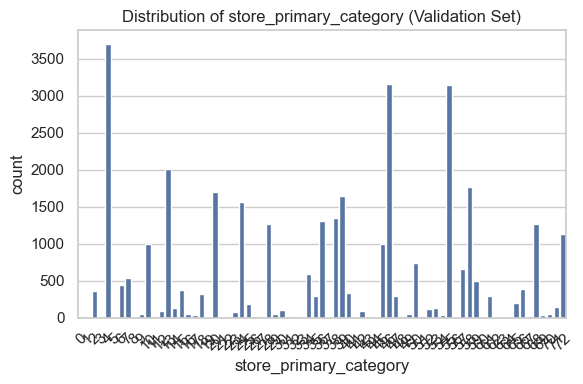

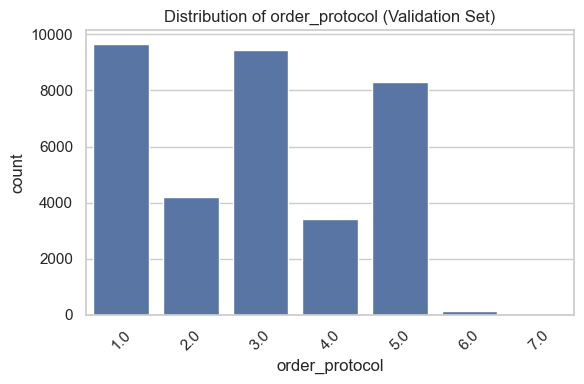

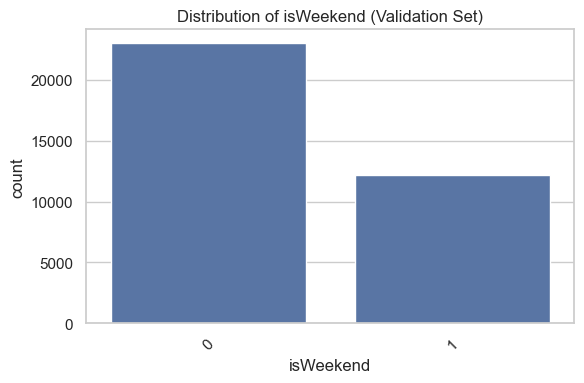

In [82]:
# Distribution of categorical columns

for col in categorical_cols:
    if col in X_test.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=X_test[col])
        plt.title(f'Distribution of {col} (Validation Set)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

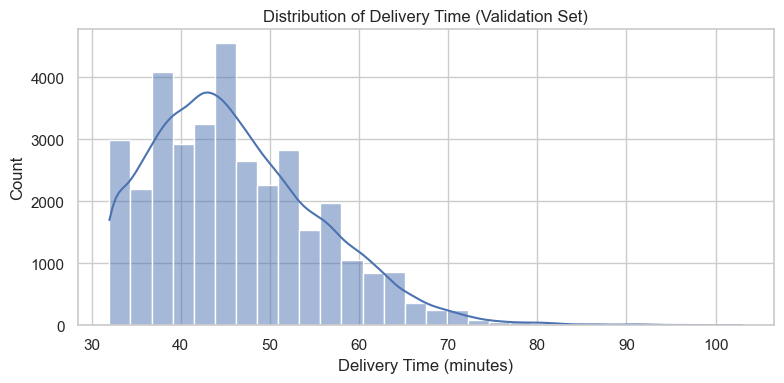

In [84]:
# Distribution of time_taken
plt.figure(figsize=(8, 4))
sns.histplot(y_test, kde=True, bins=30)
plt.title('Distribution of Delivery Time (Validation Set)')
plt.xlabel('Delivery Time (minutes)')
plt.tight_layout()
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [92]:
print(val_df.columns)


Index(['market_id', 'store_primary_category', 'order_protocol', 'subtotal',
       'max_item_price', 'total_outstanding_orders', 'distance', 'order_hour',
       'order_dayofweek', 'isWeekend', 'delivery_time_minutes'],
      dtype='object')


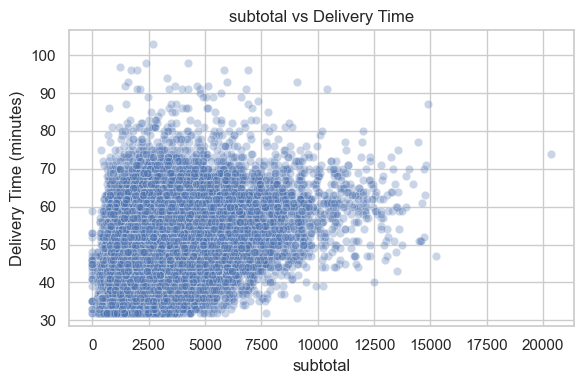

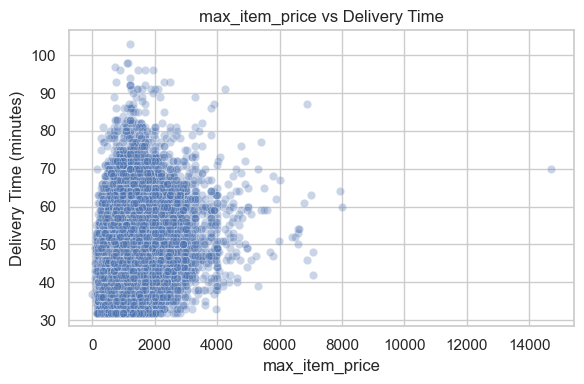

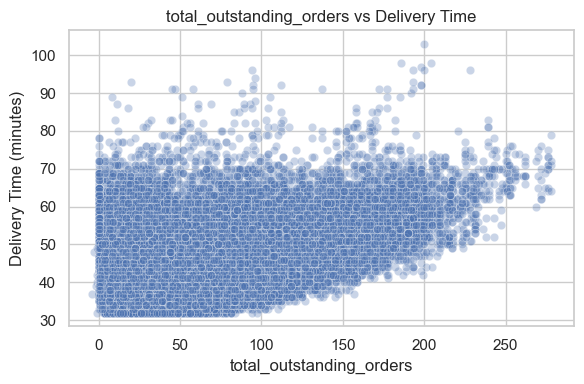

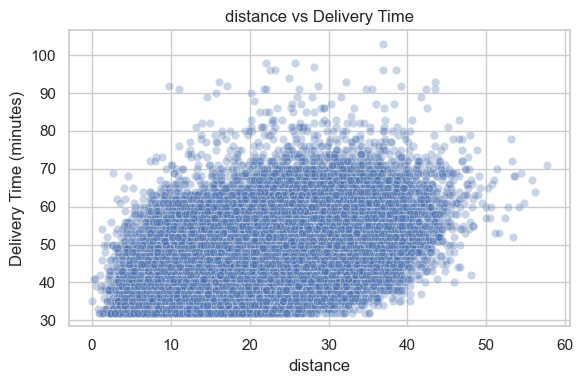

In [94]:
# Scatter plot to visualise the relationship between time_taken and other features
val_df = X_test.copy()
val_df['delivery_time_minutes'] = y_test

num_features = ['subtotal','max_item_price', 
                'total_outstanding_orders', 'distance']  # exclude any dropped earlier

# Create scatter plots
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=val_df, x=col, y='delivery_time_minutes', alpha=0.3)
    plt.title(f'{col} vs Delivery Time')
    plt.xlabel(col)
    plt.ylabel('Delivery Time (minutes)')
    plt.tight_layout()
    plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [96]:
correlations = val_df.corr(numeric_only=True)['delivery_time_minutes'].sort_values()

# Display correlations
print(correlations)

order_hour                 -0.35
order_dayofweek             0.05
max_item_price              0.26
total_outstanding_orders    0.38
subtotal                    0.41
distance                    0.46
delivery_time_minutes       1.00
Name: delivery_time_minutes, dtype: float64


In [106]:
val_df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'subtotal',
       'max_item_price', 'total_outstanding_orders', 'distance', 'order_hour',
       'order_dayofweek', 'isWeekend', 'delivery_time_minutes'],
      dtype='object')

In [114]:
X_train.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'subtotal',
       'max_item_price', 'total_outstanding_orders', 'distance', 'isWeekend'],
      dtype='object')

In [126]:
print(X_train.columns)

Index(['market_id', 'store_primary_category', 'order_protocol', 'subtotal',
       'max_item_price', 'total_outstanding_orders', 'distance', 'isWeekend'],
      dtype='object')


In [128]:
# # Drop the weakly correlated columns from training dataset

X_train = X_train.drop(columns=['market_id', 'store_primary_category', 'order_protocol'])
X_test = X_test.drop(columns=['market_id', 'store_primary_category', 'order_protocol'])


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [132]:
# Import libraries

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Preprocessing (if needed)
from sklearn.preprocessing import StandardScaler

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [134]:
# Apply scaling to the numerical columns
from sklearn.preprocessing import StandardScaler

# Define numerical columns to scale
numerical_cols = ['subtotal', 'max_item_price', 'total_outstanding_orders', 'distance']

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [136]:
# Create/Initialise the model
linreg = LinearRegression()

# Fit the model on training data
linreg.fit(X_train, y_train)

# Predict on test data
y_pred = linreg.predict(X_test)


In [138]:
# Train the model using the training data
linreg.fit(X_train, y_train)

LinearRegression()

In [140]:
# Make predictions
y_pred = linreg.predict(X_test)

In [142]:
# Find results for evaluation metrics

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 5.24
Root Mean Squared Error (RMSE): 6.78
R-squared (R²): 0.4743


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [145]:
# Loop through the number of features and test the model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Store results
results = []

# Loop from 5 to total number of features
total_features = X_train.shape[1]
for k in range(5, total_features + 1):
    model = LinearRegression()
    rfe = RFE(estimator=model, n_features_to_select=k)
    rfe.fit(X_train, y_train)

    # Select only the top k features
    X_train_rfe = X_train.loc[:, rfe.support_]
    X_test_rfe = X_test.loc[:, rfe.support_]

    # Train and predict
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)

    # Evaluate
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((k, r2, rmse))

# Print results
for k, r2, rmse in results:
    print(f"{k} features => R²: {r2:.4f}, RMSE: {rmse:.2f}")



5 features => R²: 0.4743, RMSE: 6.78


In [147]:
# Build the final model with selected number of features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Use the same RFE object from earlier (with n_features_to_select=5)
final_model = LinearRegression()
rfe = RFE(estimator=final_model, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Get top 5 features
selected_features = X_train.columns[rfe.support_]

# Subset training and test sets
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Train final model
final_model.fit(X_train_rfe, y_train)

# Predict
y_pred_final = final_model.predict(X_test_rfe)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2 = r2_score(y_test, y_pred_final)

# Print results
print("Selected features:", selected_features.tolist())
print(f"Final Model MAE: {mae:.2f}")
print(f"Final Model RMSE: {rmse:.2f}")
print(f"Final Model R²: {r2:.4f}")

Selected features: ['subtotal', 'max_item_price', 'total_outstanding_orders', 'distance', 'isWeekend']
Final Model MAE: 5.24
Final Model RMSE: 6.78
Final Model R²: 0.4743


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [149]:
residuals = y_test - y_pred_final

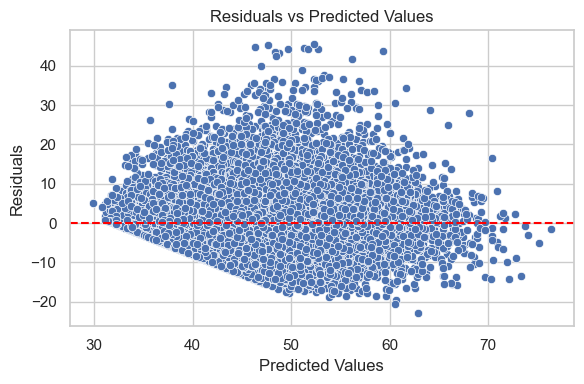

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_final, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.tight_layout()
plt.show()

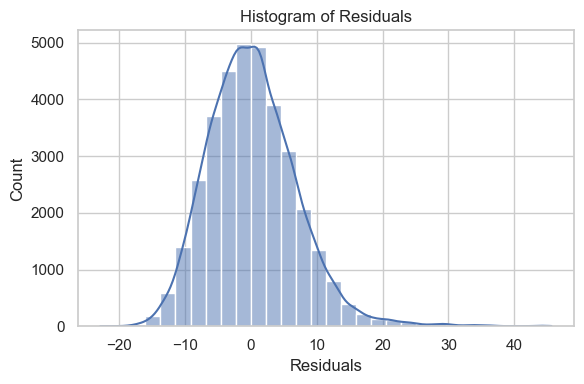

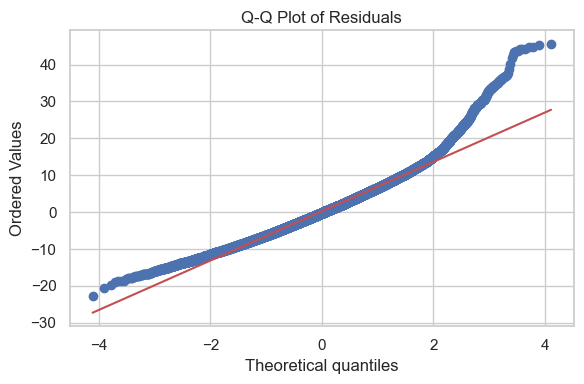

In [153]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()

import scipy.stats as stats

plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [155]:
coeff_scaled = pd.Series(final_model.coef_, index=selected_features)
print("Scaled Coefficients:\n", coeff_scaled)

Scaled Coefficients:
 subtotal                   2.99
max_item_price             0.20
total_outstanding_orders   2.67
distance                   3.89
isWeekend                  1.83
dtype: float64


In [157]:
# Compare the scaled vs unscaled features used in the final model
from sklearn.linear_model import LinearRegression

# Use same 5 features before scaling
X_train_unscaled = X[selected_features].loc[X_train.index]
X_test_unscaled = X[selected_features].loc[X_test.index]

# Train model on unscaled data
unscaled_model = LinearRegression()
unscaled_model.fit(X_train_unscaled, y_train)

# Get unscaled coefficients
coeff_unscaled = pd.Series(unscaled_model.coef_, index=selected_features)
print("Unscaled Coefficients:\n", coeff_unscaled)


Unscaled Coefficients:
 subtotal                   0.00
max_item_price             0.00
total_outstanding_orders   0.05
distance                   0.45
isWeekend                  1.83
dtype: float64


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [159]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# Get scaled coefficient (from final model)
scaled_coeff = coeff_scaled['total_outstanding_orders']

# Get std dev of unscaled feature from original X
std_unscaled = X['total_outstanding_orders'].std()

# Calculate effect of a 1-unit increase in the original feature
effect_per_unit = scaled_coeff * (1 / std_unscaled)

print(f"A 1-unit increase in 'total_outstanding_orders' increases delivery time by approx. {effect_per_unit:.2f} minutes.")


A 1-unit increase in 'total_outstanding_orders' increases delivery time by approx. 0.05 minutes.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

Categorical Variables Identified:

market_id
store_primary_category
order_protocol
isWeekend

Inference from Analysis:
Based on the EDA and correlation heatmap, here’s what we observed:

market_id, store_primary_category, and order_protocol had very low or negligible correlation with the target variable delivery_time_minutes. Their distributions showed no strong trend or effect.

isWeekend, however, showed a moderate positive effect. It had:

A scaled coefficient of ~1.8

An unscaled coefficient of ~1.8
This suggests that deliveries made on weekends took about 1.8 minutes longer on average compared to weekdays.

While most categorical variables had little impact on delivery time, weekend status (isWeekend) had a noticeable effect, possibly due to increased demand or traffic congestion.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

test_size=0.2 means 20% of the total data is used for testing.

The remaining 80% is used for training the model.

The test set is never seen by the model during training.

It provides an unbiased evaluation of the model's performance on unseen data.

Ensures the model generalizes well beyond the training data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**

distance
Correlation coefficient: 0.46


This means that as the delivery distance increases, the delivery time also tends to increase, which aligns with real-world expectations.





---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

I used .describe() to get the mean, 25th percentile (Q1), 75th percentile (Q3), and max/min of each numerical feature.

Applied the Interquartile Range (IQR) rule:

IQR = Q3 - Q1

Outliers are values < Q1 - 1.5×IQR or **> Q3 + 1.5×IQR`

This was done using a reusable loop to identify how many outliers each feature had.

Histograms and box plots were plotted for all numerical features to visually inspect skewness and extreme values.

Features like distance, subtotal, and total_outstanding_orders showed right-skewed distributions with long tails.


Dropped only extreme values from features with low correlation (i.e., less impactful on the target).

Focused on retaining important predictors like distance even if they had natural outliers (long-distance deliveries).



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

distance

Highest correlation with delivery time.

Unscaled coefficient: 0.45 → Each extra kilometer adds ~27 seconds to delivery time.

Scaled coefficient: 3.89

isWeekend

Unscaled coefficient: 1.83 → Weekend orders take ~1.8 minutes longer on average.

Scaled coefficient: 1.83

total_outstanding_orders

Unscaled coefficient: 0.05 → Each additional pending order adds ~3 seconds.

Scaled coefficient: 2.67



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>
Linear regression is a supervised learning algorithm used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.

Model Assumption:
It assumes a linear relationship between input variables (X) and the output (y). For multiple inputs, the model is:

Objective:
The goal is to find the best-fitting line (or hyperplane) by minimizing the cost function, typically Mean Squared Error (MSE), which measures the average squared difference between actual and predicted values.

Learning Process:
Coefficients are estimated using methods like Gradient Descent (iteratively updating coefficients to reduce error) or Normal Equation (a direct formula to compute coefficients). Once trained, the model predicts outcomes for new data using the learned equation.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>
Simple Linear Regression

Uses only one independent variable.

Models the relationship as a straight line.

Suitable for analyzing simple, linear trends.

Multiple Linear Regression

Uses two or more independent variables.

Models the relationship as a plane (or hyperplane).

Suitable for capturing more complex relationships in data.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
The cost function evaluates model performance.

Minimizing it ensures the best possible fit to the training data.

Techniques like gradient descent or the normal equation are used to find the optimal coefficients.






---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**


Overfitting
Definition: The model learns too much from the training data, including noise and random fluctuations.

Symptoms:

Very high accuracy on training data.

Poor performance on validation/test data.

Cause: Model is too complex (too many parameters, not enough regularization).

Example: A decision tree that perfectly memorizes every training sample, but can't generalize.

---
Underfitting
Definition: The model is too simple to capture the underlying patterns in the data.

Symptoms:

Poor accuracy on both training and validation/test data.

Cause: Model is not powerful enough (too few features, too simple a model).

Example: A linear model trying to fit non-linear data.


##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**

Residual plots are crucial for diagnosing the validity of a linear regression model because they reveal whether the model’s assumptions hold true.

Here’s how they help:

Detect Non-Linearity:
If residuals show a pattern (like a curve), it suggests the relationship between predictors and response is not linear, and a linear model may be inappropriate.

Check Homoscedasticity (Equal Variance):
Residuals should have constant spread across all values of the predicted variable. A funnel shape (widening or narrowing) indicates heteroscedasticity, violating model assumptions.

Identify Outliers and Influential Points:
Points with very large residuals are potential outliers. Clusters far from the rest might strongly influence the model, requiring further investigation.

Assess Independence:
If residuals are randomly scattered, it suggests independence of errors. Patterns (like waves or cycles) may indicate autocorrelation, often seen in time series data.

